In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('boston summary.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,179.460130,5.93,52698,4473.477,4.7,287529.502,1317.6788,41.00%,226272.0000,0.50%,1479,0.02,197.4
1,4/1/2005,180.493176,5.86,52698,4473.477,4.4,287529.502,1317.6788,41.00%,227099.6667,0.47%,1235,0.32,198.6
2,5/1/2005,180.710013,5.72,52698,4473.477,4.3,287529.502,1317.6788,41.00%,227927.3333,0.43%,1616,0.42,198.6
3,6/1/2005,180.083117,5.58,52698,4473.477,4.8,287529.502,1317.6788,41.00%,228755.0000,0.40%,1983,0.32,198.8
4,7/1/2005,180.011995,5.70,52698,4473.477,4.6,287529.502,1317.6788,41.00%,229226.6667,0.43%,1632,1.06,198.8
5,8/1/2005,179.700994,5.82,52698,4473.477,4.3,287529.502,1317.6788,41.00%,229698.3333,0.47%,1222,0.93,207.2
6,9/1/2005,180.147647,5.77,52698,4473.477,4.7,287529.502,1317.6788,41.00%,230170.0000,0.50%,1252,1.23,207.2
7,10/1/2005,180.012971,6.07,52698,4473.477,4.2,287529.502,1317.6788,40.00%,231436.3333,0.53%,1235,1.15,203.2
8,11/1/2005,180.811955,6.33,52698,4473.477,4.4,287529.502,1317.6788,40.00%,232702.6667,0.57%,1234,0.94,203.2
9,12/1/2005,180.437704,6.27,52698,4473.477,4.2,287529.502,1317.6788,40.00%,233969.0000,0.60%,1714,0.73,204.9


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,179.460130,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.4,41.0,0.50
1,4/1/2005,180.493176,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.6,41.0,0.47
2,5/1/2005,180.710013,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.6,41.0,0.43
3,6/1/2005,180.083117,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.8,41.0,0.40
4,7/1/2005,180.011995,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.8,41.0,0.43


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.400,41.0,0.50
1,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.600,41.0,0.47
2,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.600,41.0,0.43
3,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.800,41.0,0.40
4,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.800,41.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,78923,4873.019,3.5,464426.027,669.2019,241737.0000,1032,2.60,250.226,36.0,1.23
150,3.81,78923,4873.019,3.3,464426.027,669.2019,241994.0000,1245,2.50,250.226,36.0,1.20
151,3.90,78923,4873.019,3.0,464426.027,669.2019,242478.3333,1227,3.15,250.374,36.0,1.17
152,3.92,78923,4873.019,2.9,464426.027,669.2019,242962.6667,989,2.47,250.374,36.0,1.13


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.91250,4.43000,5.85000,6.7600
Personal_Income,154.0,63364.331169,7831.639030,52698.0000,56800.00000,62416.00000,69399.00000,78923.0000
Resident_Population,154.0,4668.829039,126.859625,4473.4770,4566.34800,4656.59300,4778.34000,4873.0190
Unemployment_Rate,154.0,5.283766,1.407704,2.9000,4.20000,5.00000,6.40000,8.6000
GDP,154.0,362383.183110,53395.798830,287529.5020,312220.17100,356854.84600,405651.20700,464426.0270
Crime_Rate,154.0,924.491787,221.460031,669.2019,725.68850,845.24410,1104.44770,1339.4548
Median_Debt,154.0,240495.798701,4063.449827,226272.0000,238447.08335,240211.33335,243726.66665,246863.0000
New_Structures,154.0,899.766234,432.260766,237.0000,595.25000,842.00000,1128.00000,2129.0000
Economic_Conditions_Index,154.0,1.348117,1.735384,-5.2100,0.91500,1.62000,2.50000,4.0200
CPI less shelter,154.0,229.706351,14.651442,197.4000,217.33200,235.46600,241.68150,252.9320


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.361954,-1.539907,-0.414694,-1.401865,1.775431,-3.500424,1.340010,-0.765316,-2.204995,0.671186,-1.568792
1,1.051011,-1.361954,-1.539907,-0.627807,-1.401865,1.775431,-3.296739,0.775536,-0.592443,-2.123091,0.671186,-1.593345
2,0.916107,-1.361954,-1.539907,-0.698845,-1.401865,1.775431,-3.093053,1.656948,-0.534819,-2.123091,0.671186,-1.626081
3,0.781203,-1.361954,-1.539907,-0.343656,-1.401865,1.775431,-2.889367,2.505973,-0.592443,-2.109441,0.671186,-1.650633
4,0.896835,-1.361954,-1.539907,-0.485732,-1.401865,1.775431,-2.773292,1.693963,-0.166025,-2.109441,0.671186,-1.626081
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,1.986643,1.609574,-1.267146,1.911065,-1.152758,0.305455,0.305912,0.721387,1.400521,-1.938982,-0.971355
150,-0.924366,1.986643,1.609574,-1.409221,1.911065,-1.152758,0.368702,0.798670,0.663762,1.400521,-1.938982,-0.995907
151,-0.837642,1.986643,1.609574,-1.622334,1.911065,-1.152758,0.487894,0.757029,1.038319,1.410622,-1.938982,-1.020459
152,-0.818370,1.986643,1.609574,-1.693372,1.911065,-1.152758,0.607087,0.206435,0.646475,1.410622,-1.938982,-1.053195


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

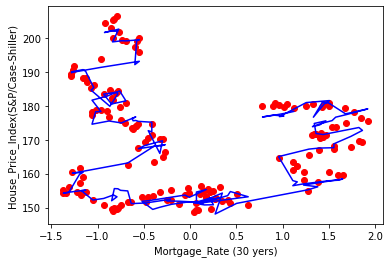

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.1
Accuracy: 98.74 %.


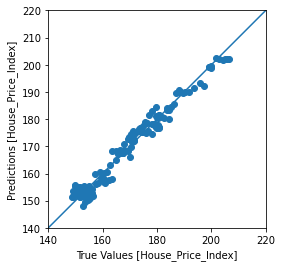

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9718671788282895

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,4.650896
1,22.036434
2,-8.162014
3,0.608413
4,-3.964170
5,3.510232
6,-1.145575
7,-0.008212
8,0.885347
9,-0.487383


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[178.35200496 177.94392798 177.28487808 176.72643997 177.27815084
 177.01419587 176.8316427  180.97542673 181.56180651 180.52579419
 176.66356857 181.01871601 180.87736673 177.66482035 178.14485164
 178.65161209 179.11396523 177.42683701 176.6715758  175.65997431
 174.82453796 173.8793153  174.3785571  175.59167208 174.81722775
 171.85327431 171.5544762  173.62022788 172.76785617 170.99942941
 168.81737814 167.66934911 167.55211424 167.25258255 165.0444977
 157.95940552 157.59520955 156.46258034 157.01080203 157.92144306
 158.08222386 158.45038076 156.65509426 156.14986509 155.26265852
 151.25240157 148.11920163 154.29796892 152.88003104 151.37478197
 151.26055367 153.20395344 154.74288684 153.53947702 152.5516379
 151.81747117 151.01771111 150.7954283  150.84664419 152.91162513
 152.28374141 152.86196362 151.74231753 151.64713611 150.97626131
 150.10795974 149.47618124 151.8680151  152.03822287 153.70108887
 153.04128122 155.33880927 154.60046782 151.63778362 151.90200826
 151.9538712

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,178.352005
1,177.943928
2,177.284878
3,176.726440
4,177.278151
...,...
149,202.009548
150,201.632742
151,202.247775
152,202.016398


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,...,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643
Resident_Population,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,...,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574
Unemployment_Rate,-0.414694,-0.627807,-0.698845,-0.343656,-0.485732,-0.698845,-0.414694,-0.769882,-0.627807,-0.769882,...,-1.267146,-1.480259,-1.338184,-1.125071,-1.125071,-1.267146,-1.409221,-1.622334,-1.693372,-1.693372
GDP,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,...,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065
Crime_Rate,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,...,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758
Median_Debt,-3.500424,-3.296739,-3.093053,-2.889367,-2.773292,-2.657216,-2.541141,-2.229501,-1.917861,-1.606221,...,0.070433,0.106609,0.142785,0.178962,0.242208,0.305455,0.368702,0.487894,0.607087,0.726280
New_Structures,1.340010,0.775536,1.656948,2.505973,1.693963,0.745462,0.814864,0.775536,0.773223,1.883663,...,1.756425,-0.422815,1.763366,0.632104,2.256124,0.305912,0.798670,0.757029,0.206435,2.843732
Economic_Conditions_Index,-0.765316,-0.592443,-0.534819,-0.592443,-0.166025,-0.240936,-0.068064,-0.114163,-0.235174,-0.356184,...,0.704099,1.113231,1.124755,0.957646,0.923071,0.721387,0.663762,1.038319,0.646475,0.617663
CPI less shelter,-2.204995,-2.123091,-2.123091,-2.109441,-2.109441,-1.536118,-1.536118,-1.809129,-1.809129,-1.693100,...,1.222313,1.250297,1.250297,1.182522,1.182522,1.400521,1.400521,1.410622,1.410622,1.585212


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,-1.361954,...,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643,1.986643
2,Resident_Population,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,-1.539907,...,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574,1.609574
3,Unemployment_Rate,-0.414694,-0.627807,-0.698845,-0.343656,-0.485732,-0.698845,-0.414694,-0.769882,-0.627807,...,-1.267146,-1.480259,-1.338184,-1.125071,-1.125071,-1.267146,-1.409221,-1.622334,-1.693372,-1.693372
4,GDP,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,-1.401865,...,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065,1.911065
5,Crime_Rate,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,1.775431,...,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758,-1.152758
6,Median_Debt,-3.500424,-3.296739,-3.093053,-2.889367,-2.773292,-2.657216,-2.541141,-2.229501,-1.917861,...,0.070433,0.106609,0.142785,0.178962,0.242208,0.305455,0.368702,0.487894,0.607087,0.726280
7,New_Structures,1.340010,0.775536,1.656948,2.505973,1.693963,0.745462,0.814864,0.775536,0.773223,...,1.756425,-0.422815,1.763366,0.632104,2.256124,0.305912,0.798670,0.757029,0.206435,2.843732
8,Economic_Conditions_Index,-0.765316,-0.592443,-0.534819,-0.592443,-0.166025,-0.240936,-0.068064,-0.114163,-0.235174,...,0.704099,1.113231,1.124755,0.957646,0.923071,0.721387,0.663762,1.038319,0.646475,0.617663
9,CPI less shelter,-2.204995,-2.123091,-2.123091,-2.109441,-2.109441,-1.536118,-1.536118,-1.809129,-1.809129,...,1.222313,1.250297,1.250297,1.182522,1.182522,1.400521,1.400521,1.410622,1.410622,1.585212


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),4.650896
1,Personal_Income,22.036434
2,Resident_Population,-8.162014
3,Unemployment_Rate,0.608413
4,GDP,-3.964170
5,Crime_Rate,3.510232
6,Median_Debt,-1.145575
7,New_Structures,-0.008212
8,Economic_Conditions_Index,0.885347
9,CPI less shelter,-0.487383


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

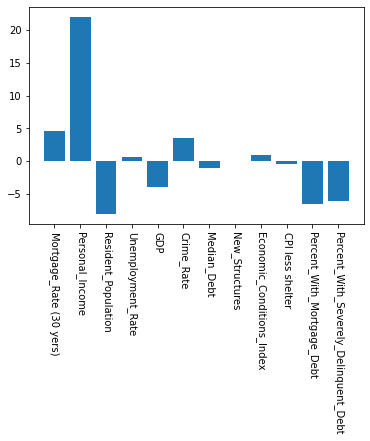

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,2018/1/1,207.867448,4.03,78923,4873.019,3.6,464426.027,622.4511,36.60%,242691,1.10%,1410,2.53,252.932
1,2018/2/1,210.636170,4.33,81498,4873.019,3.5,484620.546,622.4511,36.60%,242691,1.10%,714,2.05,254.992
2,2018/3/1,210.815006,4.44,81498,4873.019,3.3,484620.546,622.4511,36.60%,242691,1.10%,1174,2.40,254.992
3,2018/4/1,212.130453,4.47,81498,4873.019,2.9,484620.546,622.4511,35.50%,241783,1.00%,606,1.76,253.770
4,2018/5/1,213.021195,4.59,81498,4873.019,3.0,484620.546,622.4511,35.50%,241783,1.00%,2142,1.00,253.770
5,2018/6/1,213.654926,4.57,81498,4873.019,3.4,484620.546,622.4511,35.50%,241783,1.00%,1463,1.73,253.854
6,2018/7/1,213.713348,4.53,81498,4873.019,3.4,484620.546,622.4511,36.20%,242506,0.90%,952,2.43,253.854
7,2018/8/1,214.157127,4.55,81498,4873.019,3.0,484620.546,622.4511,36.20%,242506,0.90%,622,2.25,256.436
8,2018/9/1,214.797910,4.63,81498,4873.019,2.9,484620.546,622.4511,36.20%,242506,0.90%,721,1.89,256.436
9,2018/10/1,215.887128,4.83,81498,4873.019,2.6,484620.546,622.4511,36.10%,244158,0.90%,1136,1.74,256.108


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,2018/1/1,207.867448,4.03,78923,4873.019,3.6,464426.027,622.4511,242691,1410,2.53,252.932,36.6,1.1
1,2018/2/1,210.636170,4.33,81498,4873.019,3.5,484620.546,622.4511,242691,714,2.05,254.992,36.6,1.1
2,2018/3/1,210.815006,4.44,81498,4873.019,3.3,484620.546,622.4511,242691,1174,2.40,254.992,36.6,1.1
3,2018/4/1,212.130453,4.47,81498,4873.019,2.9,484620.546,622.4511,241783,606,1.76,253.770,35.5,1.0
4,2018/5/1,213.021195,4.59,81498,4873.019,3.0,484620.546,622.4511,241783,2142,1.00,253.770,35.5,1.0


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,78923,4873.019,3.6,464426.027,622.4511,242691,1410,2.53,252.932,36.6,1.1
1,4.33,81498,4873.019,3.5,484620.546,622.4511,242691,714,2.05,254.992,36.6,1.1
2,4.44,81498,4873.019,3.3,484620.546,622.4511,242691,1174,2.40,254.992,36.6,1.1
3,4.47,81498,4873.019,2.9,484620.546,622.4511,241783,606,1.76,253.770,35.5,1.0
4,4.59,81498,4873.019,3.0,484620.546,622.4511,241783,2142,1.00,253.770,35.5,1.0
5,4.57,81498,4873.019,3.4,484620.546,622.4511,241783,1463,1.73,253.854,35.5,1.0
6,4.53,81498,4873.019,3.4,484620.546,622.4511,242506,952,2.43,253.854,36.2,0.9
7,4.55,81498,4873.019,3.0,484620.546,622.4511,242506,622,2.25,256.436,36.2,0.9
8,4.63,81498,4873.019,2.9,484620.546,622.4511,242506,721,1.89,256.436,36.2,0.9
9,4.83,81498,4873.019,2.6,484620.546,622.4511,244158,1136,1.74,256.108,36.1,0.9


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,2.202891e-01,4.0300,4.4625,4.5600,4.6325,4.8700
Personal_Income,12.0,81283.416667,7.433385e+02,78923.0000,81498.0000,81498.0000,81498.0000,81498.0000
Resident_Population,12.0,4873.019000,0.000000e+00,4873.0190,4873.0190,4873.0190,4873.0190,4873.0190
Unemployment_Rate,12.0,3.050000,3.896385e-01,2.5000,2.8250,3.0000,3.4000,3.6000
GDP,12.0,482937.669417,5.829655e+03,464426.0270,484620.5460,484620.5460,484620.5460,484620.5460
Crime_Rate,12.0,622.451100,1.187420e-13,622.4511,622.4511,622.4511,622.4511,622.4511
Median_Debt,12.0,242784.500000,9.008797e+02,241783.0000,242325.2500,242598.5000,243057.7500,244158.0000
New_Structures,12.0,1086.916667,4.416116e+02,606.0000,719.2500,1044.0000,1240.5000,2142.0000
Economic_Conditions_Index,12.0,2.066667,4.667749e-01,1.0000,1.7550,2.1500,2.4075,2.6300
CPI less shelter,12.0,254.914667,1.241169e+00,252.9320,253.8330,254.9920,256.1080,256.4360


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,1.986643,1.609574,-1.196108,1.911065,-1.363861,0.540231,1.180384,0.681050,1.585212,-1.625762,-1.077748
1,-0.423295,2.315437,1.609574,-1.267146,2.289269,-1.363861,0.540231,-0.429755,0.404454,1.725813,-1.625762,-1.077748
2,-0.317299,2.315437,1.609574,-1.409221,2.289269,-1.363861,0.540231,0.634417,0.606138,1.725813,-1.625762,-1.077748
3,-0.288391,2.315437,1.609574,-1.693372,2.289269,-1.363861,0.316775,-0.679604,0.237344,1.642408,-2.199999,-1.159588
4,-0.172759,2.315437,1.609574,-1.622334,2.289269,-1.363861,0.316775,2.873806,-0.200599,1.642408,-2.199999,-1.159588
5,-0.192031,2.315437,1.609574,-1.338184,2.289269,-1.363861,0.316775,1.302995,0.220057,1.648141,-2.199999,-1.159588
6,-0.230575,2.315437,1.609574,-1.338184,2.289269,-1.363861,0.494703,0.120839,0.623426,1.648141,-1.834575,-1.241429
7,-0.211303,2.315437,1.609574,-1.622334,2.289269,-1.363861,0.494703,-0.642590,0.519702,1.824370,-1.834575,-1.241429
8,-0.134215,2.315437,1.609574,-1.693372,2.289269,-1.363861,0.494703,-0.413561,0.312255,1.824370,-1.834575,-1.241429
9,0.058504,2.315437,1.609574,-1.906485,2.289269,-1.363861,0.901254,0.546508,0.225819,1.801983,-1.886779,-1.241429


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[200.17744393 206.9247075  207.50106476 211.72020176 211.88430228
 212.35008274 210.43520197 210.18049992 210.31026413 210.8807599
 211.35253869 210.45195298]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,200.177444
1,206.924708
2,207.501065
3,211.720202
4,211.884302
5,212.350083
6,210.435202
7,210.180500
8,210.310264
9,210.880760
